$$\int \limits_{0}^{8}\left(sin^2(\pi x) + cos(x)\right)dx

Integral real:  4.98936


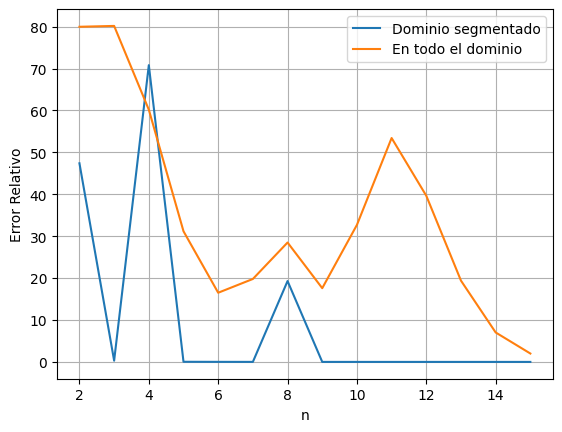

In [111]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def numerical_integration_1D(xa, xb, f, n):
    points, wi = np.polynomial.legendre.leggauss(n)
    
    m = (xb-xa)/2
    xi = m*points + m+xa

    yi = sym.lambdify(x, f)(xi)
    area = (xb-xa)*sum(wi*yi)/2
    return area

def segmented_1D_numerical_integration(la, lb, n, f):
    xn = np.linspace(la, lb, n+1)

    integral = 0
    for j in range(n):
        xa = xn[j]
        xb = xn[j+1]

        area = numerical_integration_1D(xa, xb, f, 2)
        integral += area
    return integral

x = sym.Symbol('x')
f = (sym.sin(sym.pi*x))**2 + sym.cos(x)

la, lb = (0, 8)

analyticalIntegral = round(sym.integrate(f, (x, la, lb)),5)
print('Integral real: ', round(analyticalIntegral,5))

n = 15

n_Integrals_SegmentedDomain = []
n_Integrals_FullDomain = []
errorR_SegmentedDomain = []
errorR_FullDomain = []

ns = np.arange(2, n+1, 1)

for n in ns:
    integral = segmented_1D_numerical_integration(la, lb, n, f)
    n_Integrals_SegmentedDomain.append(integral)
    errorR_SegmentedDomain.append(round(100*abs(integral-analyticalIntegral)/analyticalIntegral,3))
    
    integral = numerical_integration_1D(la, lb, f, n)
    n_Integrals_FullDomain.append(integral)
    errorR_FullDomain.append(round(100*abs(integral-analyticalIntegral)/analyticalIntegral,3))

plt.figure()
plt.plot(ns, errorR_SegmentedDomain, label = "Dominio segmentado")
plt.plot(ns, errorR_FullDomain, label = "En todo el dominio")
plt.grid()
plt.xlabel("n")
plt.ylabel("Error Relativo")
plt.legend()